### Load and import

In [1]:
import numpy as np
import pandas as pd
from janitor import clean_names
%config IPCompleter.greedy=True

In [2]:
df = pd.read_csv('../../02_Data/03_Work/work.csv',parse_dates=['date'],index_col='date')

In [7]:
mean_sales = df["sales"].mean()
std_sales = df["sales"].std()
print(f"Average sales: {mean_sales:.1f} ± {std_sales:.1f} units")

Average sales: 28.9 ± 39.0 units


In [13]:
median_sales = df["sales"].median()
p25, p75 = df["sales"].quantile([0.25, 0.75])
print(f"Median sales: {median_sales} units (25th-75th percentile: {p25}-{p75})")

Median sales: 18.0 units (25th-75th percentile: 6.0-37.0)


In [28]:
df.reset_index().sales.describe()

count    21280.000000
mean        28.874577
std         38.988147
min          0.000000
25%          6.000000
50%         18.000000
75%         37.000000
max        763.000000
Name: sales, dtype: float64

<Axes: >

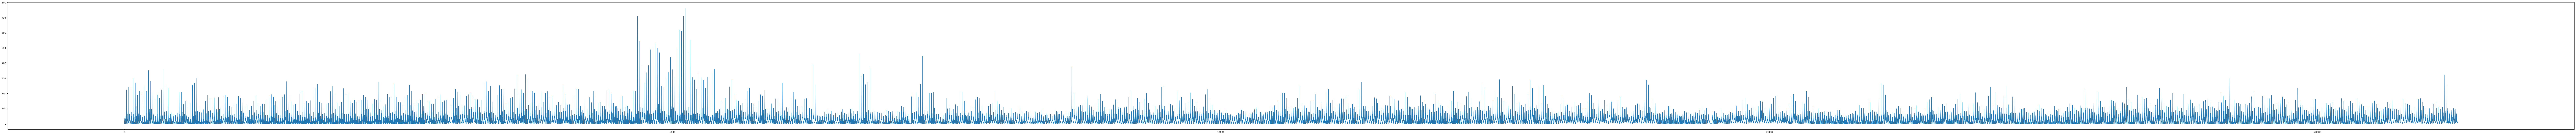

In [36]:
df.reset_index().sales.plot(figsize=(200,10))

In [3]:
df.head()

,state_id,store_id,dept_id,cat_id,item_id,wm_yr_wk,d,sales,sell_price,year,month,wday,weekday,event_name_1,event_type_1,event_name_2,event_type_2
date,,,,,,,,,,,,,,,,,
2013-01-01,CA,CA_3,FOODS_3,FOODS,FOODS_3_090,11249,d_704,0,1.25,2013,1,4,Tuesday,NewYear,National,NaN,NaN
2013-01-01,CA,CA_3,FOODS_3,FOODS,FOODS_3_120,11249,d_704,0,4.98,2013,1,4,Tuesday,NewYear,National,NaN,NaN
2013-01-01,CA,CA_3,FOODS_3,FOODS,FOODS_3_202,11249,d_704,20,4.28,2013,1,4,Tuesday,NewYear,National,NaN,NaN
2013-01-01,CA,CA_3,FOODS_3,FOODS,FOODS_3_252,11249,d_704,34,1.48,2013,1,4,Tuesday,NewYear,National,NaN,NaN
2013-01-01,CA,CA_3,FOODS_3,FOODS,FOODS_3_288,11249,d_704,0,NaN,2013,1,4,Tuesday,NewYear,National,NaN,NaN


### Identify

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21280 entries, 2013-01-01 to 2015-11-30
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   state_id      21280 non-null  object 
 1   store_id      21280 non-null  object 
 2   dept_id       21280 non-null  object 
 3   cat_id        21280 non-null  object 
 4   item_id       21280 non-null  object 
 5   wm_yr_wk      21280 non-null  int64  
 6   d             21280 non-null  object 
 7   sales         21280 non-null  int64  
 8   sell_price    21209 non-null  float64
 9   year          21280 non-null  int64  
 10  month         21280 non-null  int64  
 11  wday          21280 non-null  int64  
 12  weekday       21280 non-null  object 
 13  event_name_1  1700 non-null   object 
 14  event_type_1  1700 non-null   object 
 15  event_name_2  60 non-null     object 
 16  event_type_2  60 non-null     object 
dtypes: float64(1), int64(5), object(11)
memory usage: 2.

In [5]:
df.dtypes

state_id         object
store_id         object
dept_id          object
cat_id           object
item_id          object
wm_yr_wk          int64
d                object
sales             int64
sell_price      float64
year              int64
month             int64
wday              int64
weekday          object
event_name_1     object
event_type_1     object
event_name_2     object
event_type_2     object
dtype: object

In [6]:
df = df.astype({'year':'object',
               'month': 'O',
               'wday': 'O'})

df.dtypes

state_id         object
store_id         object
dept_id          object
cat_id           object
item_id          object
wm_yr_wk          int64
d                object
sales             int64
sell_price      float64
year             object
month            object
wday             object
weekday          object
event_name_1     object
event_type_1     object
event_name_2     object
event_type_2     object
dtype: object

### Unique values

In [7]:
df.nunique().sort_values()

state_id           1
dept_id            1
cat_id             1
store_id           2
event_type_2       2
event_name_2       3
year               3
event_type_1       4
weekday            7
wday               7
item_id           10
month             12
sell_price        23
event_name_1      30
wm_yr_wk         153
sales            301
d               1064
dtype: int64

In [8]:
df = df.drop_constant_columns()

### Duplicates

In [9]:
df.duplicated().sum()

0

### Separate categoric/numeric

In [69]:
cat= df.select_dtypes(exclude = 'number').copy()
num = df.select_dtypes(include = 'number').copy()

### Manage categoric

#### Nulls

In [70]:
cat.isna().sum().sort_values(ascending = False)

event_name_2    21220
event_type_2    21220
event_name_1    19580
event_type_1    19580
d                   0
store_id            0
item_id             0
weekday             0
wday                0
month               0
year                0
dtype: int64

In [71]:
cat.event_name_1.value_counts(dropna= False)

event_name_1
NaN                    19580
NewYear                   60
OrthodoxChristmas         60
MartinLutherKingDay       60
SuperBowl                 60
LentStart                 60
ValentinesDay             60
PresidentsDay             60
LentWeek2                 60
Purim End                 60
StPatricksDay             60
Easter                    60
Pesach End                60
Mother's day              60
MemorialDay               60
Thanksgiving              60
NBAFinalsStart            60
NBAFinalsEnd              60
IndependenceDay           60
Eid al-Fitr               60
Ramadan starts            60
LaborDay                  60
ColumbusDay               60
Halloween                 60
EidAlAdha                 60
VeteransDay               60
OrthodoxEaster            40
Father's day              40
Chanukah End              40
Christmas                 40
Cinco De Mayo             40
Name: count, dtype: int64

In [72]:
# nulls are not lost data, but real information (the day is just a normal day)

In [73]:
cat.event_name_2.value_counts(dropna= False)

event_name_2
NaN               21220
Cinco De Mayo        20
OrthodoxEaster       20
Father's day         20
Name: count, dtype: int64

In [74]:
cat.event_type_1.value_counts(dropna= False)

event_type_1
NaN          19580
National       580
Religious      560
Cultural       380
Sporting       180
Name: count, dtype: int64

In [75]:
cat.event_type_2.value_counts(dropna= False)

event_type_2
NaN          21220
Cultural        40
Religious       20
Name: count, dtype: int64

In [76]:
# let's see how event names relate

pd.crosstab(index = cat.event_name_1, columns = cat.event_name_2)

event_name_2,Cinco De Mayo,Father's day,OrthodoxEaster
event_name_1,,,
Easter,0,0,20
NBAFinalsEnd,0,20,0
OrthodoxEaster,20,0,0


In [77]:
#event_name_2 have repeated events included in event_name_1
# also they don't match
# event_2 seems less reliable, so we are going to drop it.

# nulls are just regular days

####  correcting nulls

In [78]:
cat.drop(columns = ['event_name_2','event_type_2'],inplace = True)

In [79]:
var_to_impute_by_value = ['event_name_1','event_type_1']
value = 'No_event'
cat[var_to_impute_by_value] = cat[var_to_impute_by_value].fillna(value)

In [80]:
cat.isna().sum().sort_values(ascending = True)

store_id        0
item_id         0
d               0
year            0
month           0
wday            0
weekday         0
event_name_1    0
event_type_1    0
dtype: int64

#### Atypicals

In [81]:
for variable in cat:
    print(variable + '\n')
    print(cat[variable].value_counts(dropna = False))
    print('\n\n')

store_id

store_id
CA_3    10640
CA_4    10640
Name: count, dtype: int64



item_id

item_id
FOODS_3_090    2128
FOODS_3_120    2128
FOODS_3_202    2128
FOODS_3_252    2128
FOODS_3_288    2128
FOODS_3_329    2128
FOODS_3_555    2128
FOODS_3_586    2128
FOODS_3_587    2128
FOODS_3_714    2128
Name: count, dtype: int64



d

d
d_1767    20
d_704     20
d_705     20
d_706     20
d_707     20
          ..
d_715     20
d_716     20
d_717     20
d_718     20
d_719     20
Name: count, Length: 1064, dtype: int64



year

year
2013    7300
2014    7300
2015    6680
Name: count, dtype: int64



month

month
1     1860
3     1860
7     1860
5     1860
8     1860
10    1860
6     1800
4     1800
11    1800
9     1800
2     1680
12    1240
Name: count, dtype: int64



wday

wday
4    3040
5    3040
6    3040
7    3040
1    3040
2    3040
3    3040
Name: count, dtype: int64



weekday

weekday
Tuesday      3040
Wednesday    3040
Thursday     3040
Friday       3040
Saturday     3040
Sunday       3040

In [82]:
# - There aren't uncommon categories
# - there are some months with less entries, may be months with less than 31 days
# - 2015 have less entries, the validation ones we extracted

In [83]:
df.groupby('year').d.nunique()

year
2013    365
2014    365
2015    334
Name: d, dtype: int64

### Manage Numeric

In [84]:
num.describe().T

,count,mean,std,min,25%,50%,75%,max
wm_yr_wk,21280.0,11415.022556,82.874752,11249.0,11335.0,11420.00,11506.00,11544.00
sales,21280.0,28.874577,38.988147,0.0,6.0,18.00,37.00,763.00
sell_price,21209.0,2.397254,1.237024,1.0,1.5,1.58,2.98,4.98


#### nulls

In [85]:
num.isna().sum()

wm_yr_wk       0
sales          0
sell_price    71
dtype: int64

In [86]:
# by product

df.groupby('item_id')['sell_price'].agg(lambda x: x.isna().sum())

item_id
FOODS_3_090     0
FOODS_3_120     0
FOODS_3_202     0
FOODS_3_252     0
FOODS_3_288    71
FOODS_3_329     0
FOODS_3_555     0
FOODS_3_586     0
FOODS_3_587     0
FOODS_3_714     0
Name: sell_price, dtype: int64

In [87]:
# by sales

df.groupby('sales')['sell_price'].agg(lambda x: x.isna().sum())


sales
0      71
1       0
2       0
3       0
4       0
       ..
554     0
613     0
620     0
709     0
763     0
Name: sell_price, Length: 301, dtype: int64

In [88]:
df.loc[df.sell_price.isna()].sales.sum()

0

In [89]:
# this product doesn't have price information just the days that are no sales
# we can change the null for its last known price
# this can be tricky for the first cases where there are no known prices before

# we can also impute by mode

#### correct nulls

In [90]:
num = pd.concat([num,cat.item_id], axis=1)
num.head()

,wm_yr_wk,sales,sell_price,item_id
date,,,,
2013-01-01,11249,0,1.25,FOODS_3_090
2013-01-01,11249,0,4.98,FOODS_3_120
2013-01-01,11249,20,4.28,FOODS_3_202
2013-01-01,11249,34,1.48,FOODS_3_252
2013-01-01,11249,0,NaN,FOODS_3_288


In [114]:
mode_per_item = num.groupby('item_id')['sell_price'].transform(lambda x: x.fillna(x.mode()[0]))

In [119]:
num['sell_price'] = mode_per_item

In [124]:
# checking

num.groupby('item_id').sell_price.value_counts()

item_id      sell_price
FOODS_3_090  1.48           658
             1.38           546
             1.44           504
             1.00           280
             1.50            90
             1.25            50
FOODS_3_120  4.98          2128
FOODS_3_202  4.58           727
             4.38           525
             4.28           386
             3.98           350
             3.00           105
             3.33            21
             3.25             7
             4.48             7
FOODS_3_252  1.58          1182
             1.48           946
FOODS_3_288  1.50          2100
             1.25            21
             1.18             7
FOODS_3_329  2.98          2079
             2.74            42
             1.98             7
FOODS_3_555  1.58          1149
             1.68           979
FOODS_3_586  1.58          1149
             1.68           979
FOODS_3_587  2.48          1644
             2.68           421
             1.98            63
FOODS_3_714  1.5

In [125]:
# drop the id we used
num.drop(columns='item_id', inplace = True)

In [166]:
num.head()

,wm_yr_wk,sales,sell_price
date,,,
2013-01-01,11249,0,1.25
2013-01-01,11249,0,4.98
2013-01-01,11249,20,4.28
2013-01-01,11249,34,1.48
2013-01-01,11249,0,1.50


#### Atypicals

In [134]:
num_std = 4

In [135]:
def indexes_of_atypicals_by_std(variable, num_std = 4):
    
    variable = variable.dropna()
    mean = np.mean(variable)
    sd = np.std(variable)
    threshold = sd * num_std
    lim_inf = mean - threshold
    lim_sup = mean + threshold
    # find indexes out of limits
    indexes = [index for index,value in variable.items() if value < lim_inf or value > lim_sup]
    return(indexes)

In [136]:
def atypical_count(df,variable, num_std = 4):
    atypicals = indexes_of_atypicals_by_std(df[variable], num_std)
    return(df.loc[atypicals,variable].value_counts())

In [137]:
var_atypicals_dt = ['sales', 'sell_price']

In [138]:
for variable in var_atypicals_dt:
    print('\n' + variable + ':\n')
    print(atypical_count(num,variable,num_std))


sales:

sales
0      518
1      103
5      100
10      95
7       92
      ... 
376      1
158      1
139      1
103      1
107      1
Name: count, Length: 247, dtype: int64

sell_price:

Series([], Name: count, dtype: int64)


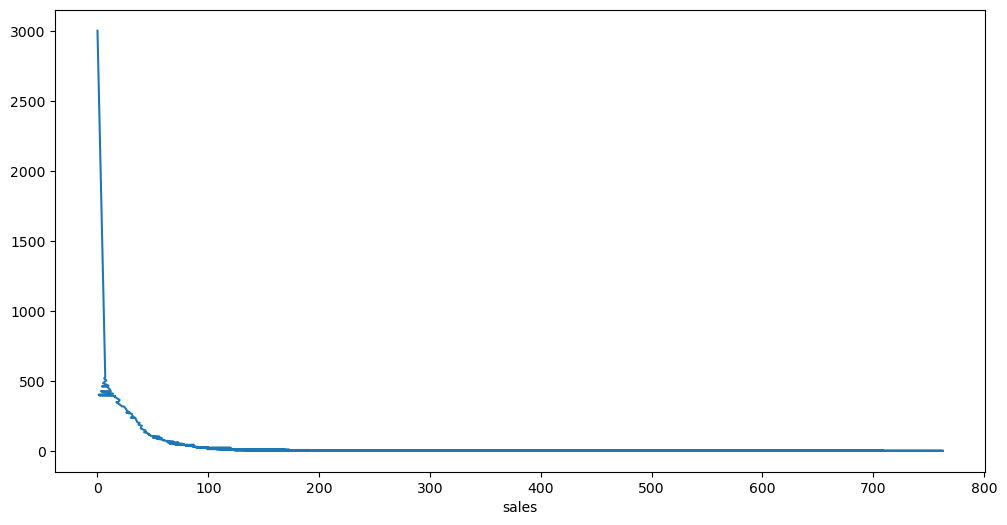

In [148]:
num.sales.value_counts().plot(figsize = (12,6));

In [150]:
# long tail distribution

# this atypicals are likely sports events and significantly true data, better not to do anything for now

### Save datasets

In [151]:
df.to_pickle('../../02_Data/03_Work/work_result_quality.pickle') # df is just work.csv
cat.to_pickle('../../02_Data/03_Work/cat_result_quality.pickle')
num.to_pickle('../../02_Data/03_Work/num_result_quality.pickle')